# Introdução ao Geopandas
## Aspectos da mineração em Pernambuco

link para os dados aqui [Dados Abertos Sigmine](https://dados.gov.br/dataset/sistema-de-informacoes-geograficas-da-mineracao-sigmine)

Por Pedro_kpaxo

In [1]:
# - Importando as livrarias necessárias
import geopandas as gpd
import seaborn as sns

In [2]:
# - Utilizando o comando read_file('path')
# - Insira o caminho do arquivo aqui.
path = ''
processos = gpd.read_file(path)

In [3]:
# - Utilizando o comando .head() para uma primeira análise 
processos.head()

,PROCESSO,NUMERO,ANO,AREA_HA,ID,FASE,ULT_EVENTO,NOME,SUBS,USO,UF,DSProcesso,geometry
0,541/1935,541,1935,2358.23,{3061FDDF-E60F-45E1-B685-C6AEE6D44CCB},CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,PASSAGEM MINERAÇÃO S/A,MINÉRIO DE OURO,Não informado,MG,000.541/1935,"POLYGON Z ((-43.43647 -20.34587 0.00000, -43.4..."
1,847/1935,847,1935,458.47,{3CFA7AD9-80F5-4CBD-A1F0-B259D11BB347},CONCESSÃO DE LAVRA,1812 - ÁREA DESBLOQUEADA JUDICIALMENTE EM 04/1...,VALE S.A.,FERRO,Não informado,MG,000.847/1935,"POLYGON Z ((-43.49664 -19.93781 0.00000, -43.5..."
2,1203/1935,1203,1935,81.74,{A9B72EE9-6896-4373-A82E-EDC445E12108},CONCESSÃO DE LAVRA,470 - CONC LAV/EXIGÊNCIA PUBLICADA EM 12/07/2021,Águas Minerais de Patrocínio Ltda,ÁGUA MINERAL,Não informado,MG,001.203/1935,"POLYGON Z ((-46.84986 -18.87244 0.00000, -46.8..."
3,1261/1935,1261,1935,221.03,{3B882A14-6B2A-4679-A5B4-ECF78EB25D64},CONCESSÃO DE LAVRA,470 - CONC LAV/EXIGÊNCIA PUBLICADA EM 16/08/2021,FEDERAL COMERCIO E PARTICIPACOES S/A,ÁGUA MARINHA,Não informado,MG,001.261/1935,"POLYGON Z ((-43.26403 -20.81749 0.00000, -43.2..."
4,1341/1935,1341,1935,263.38,{7EF5CF2A-17B4-4541-9818-E26717F79CE3},CONCESSÃO DE LAVRA,418 - CONC LAV/RAL ANO BASE APRESENTADO EM 11/...,CIA DE FERRO LIGAS DA BAHIA FERBASA,NÍQUEL,Não informado,BA,001.341/1935,"POLYGON Z ((-40.44499 -10.56116 0.00000, -40.4..."


### Selecionando os processos ativos de Pernambuco

In [4]:
processos_PE = processos.loc[processos['UF']=='PE'] 

### Usando o .describe() para uma análise 'numérica'preliminar.

In [5]:
processos_PE.describe()

,NUMERO,ANO,AREA_HA
count,3708.000000,3708.000000,3708.000000
mean,829943.388080,2012.583603,708.147557
std,92601.079192,10.087653,791.657555
min,972.000000,1940.000000,0.000000
25%,840090.000000,2011.000000,45.765000
50%,840195.000000,2015.000000,216.460000
75%,840329.000000,2018.000000,1600.925000
max,874811.000000,2021.000000,2000.010000


## Agrupando os dados por ano, e fazendo uma somatória da área de cada ano.

[Text(0.5, 1.0, 'Evolução da área de mineração em Pernambuco')]

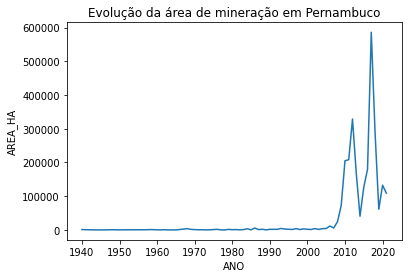

In [6]:
# - Utilizando o comando .groupby() para agrupar os dados
# - Adicionando o comando .sum() para fazer a somátoria, e o drop(columns=['']) para os números dos processos não serem somados.
# - O comando drop, remove a coluna selecionada.
processos_ano_soma = processos_PE.drop(columns=['NUMERO']).groupby('ANO').sum()
processos_ano_soma = processos_ano_soma.reset_index()

# - Plotando um simples gráfico  de linha com o sns.lineplot()
# - Passando como parametro x, os anos, e y a área total somada de cada ano
graf_ano_PE = sns.lineplot(x=processos_ano_soma['ANO'][:],y=processos_ano_soma['AREA_HA'])
graf_ano_PE.set(title='Evolução da área de mineração em Pernambuco')

### Selecionando os anos do século 20
Essa é uma forma intuitiva, fazendo o 'slice' do dataframe

[Text(0.5, 1.0, 'Evolução da área de mineração em Pernambuco no século 20')]

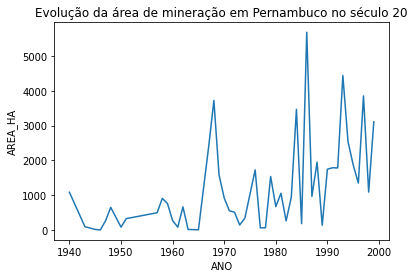

In [7]:
graf_ano_PE_s20 = sns.lineplot(x=processos_ano_soma['ANO'][0:49],y=processos_ano_soma['AREA_HA']) # - Selecionando a fatia com [0:49]
graf_ano_PE_s20.set(title='Evolução da área de mineração em Pernambuco no século 20')

[Text(0.5, 1.0, 'Evolução da área de mineração em Pernambuco durante o século 21')]

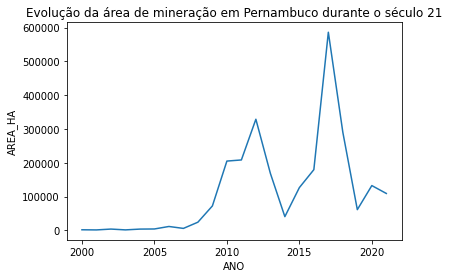

In [8]:

graf_ano_PE_sec21 = sns.lineplot(x=processos_ano_soma['ANO'][49:],y=processos_ano_soma['AREA_HA'])  # - Selecionando a fatia com [0:49]
graf_ano_PE_sec21.set(title='Evolução da área de mineração em Pernambuco durante o século 21')

### Um outro tipo de gráfico com o Seaborn, catplot.
Aqui podemos ver a distribuiçao individual dos processos ao longo dos anos.

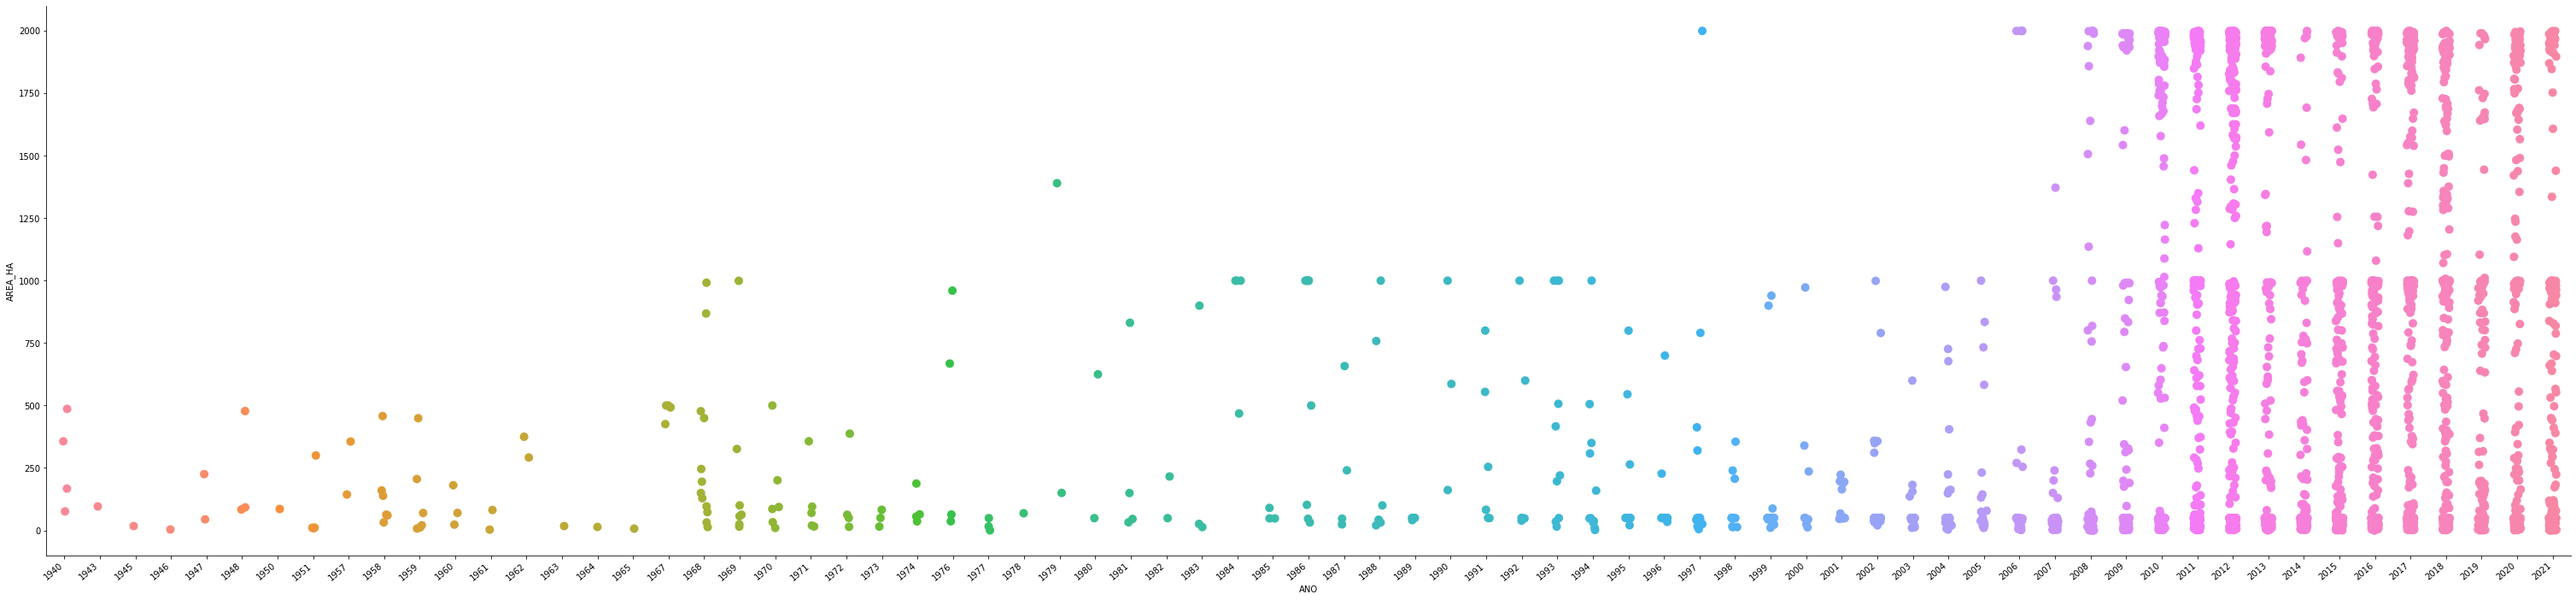

In [9]:
# - A mesma dinâmica do gráfico de linha se aplica ao gráfico catplot,
# - Passando o dataframe, ou a fatia do dataframe no parametro data
esplot =sns.catplot(data=processos_PE['AREA_HA'][39:],s=10,x=processos_PE['ANO'],y= processos_PE['AREA_HA'])

esplot.fig.set_size_inches(50,10)
esplot.set_xticklabels(rotation=40, ha="right")


